In [327]:
import pandas as pd
from os import path
%pylab inline
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

Populating the interactive namespace from numpy and matplotlib


In [2]:
snapshot_dir = '/media/notconfusing/9d9b45fc-55f7-428c-a228-1c4c4a1b728c/home/maximilianklein/snapshot_data/'

In [3]:
lssnaps = !ls $snapshot_dir

In [4]:
snapdirs = [snap for snap in lssnaps if snap[0].isdigit()]

In [5]:
all_genders = set()
#find the genders
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath).fillna(0)
    snap_genders = sldf.columns
    for g in snap_genders: 
        if g.endswith('1'):
            print(sitelinkspath)
        all_genders.add(g)

In [6]:
#populate a dict with numbers:
longitudinal_totals = {}
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    snap_genders = sldf.columns
    gendersum = sldf.sum()
    longitudinal_totals[snapdir] = gendersum

ldf = pd.DataFrame.from_dict(longitudinal_totals,orient='index').fillna(0)


In [8]:
print(len(ldf.columns))

37


In [9]:
ldf.index = pd.to_datetime(ldf.index)

In [10]:
ldf['total'] = ldf.sum(axis=1)

In [11]:
ldf['total']

2014-09-17    5869606
2014-10-13    6589799
2015-07-28    6589799
2015-08-03    6589799
2015-08-09    6609617
2015-08-12    6617934
2015-08-16    6617934
2015-08-21    6630052
2015-08-23    6630052
2015-09-06    6656076
2015-09-13    6680340
2015-09-20    6698141
2015-09-27    6714732
2015-10-13    6763390
2015-10-19    6763390
2015-10-26    6807585
2015-11-02    6824561
2015-11-09    6851235
2015-11-21    6876328
2015-11-22    6876328
2015-11-23    6901147
2015-12-04    6929623
2015-12-21    6987464
2016-01-03    6999542
Name: total, dtype: float64

In [12]:
ldf['ungendered'] = ldf['nan'] / ldf['total']

In [13]:
ldf['gender'] = 1 - ldf['ungendered']

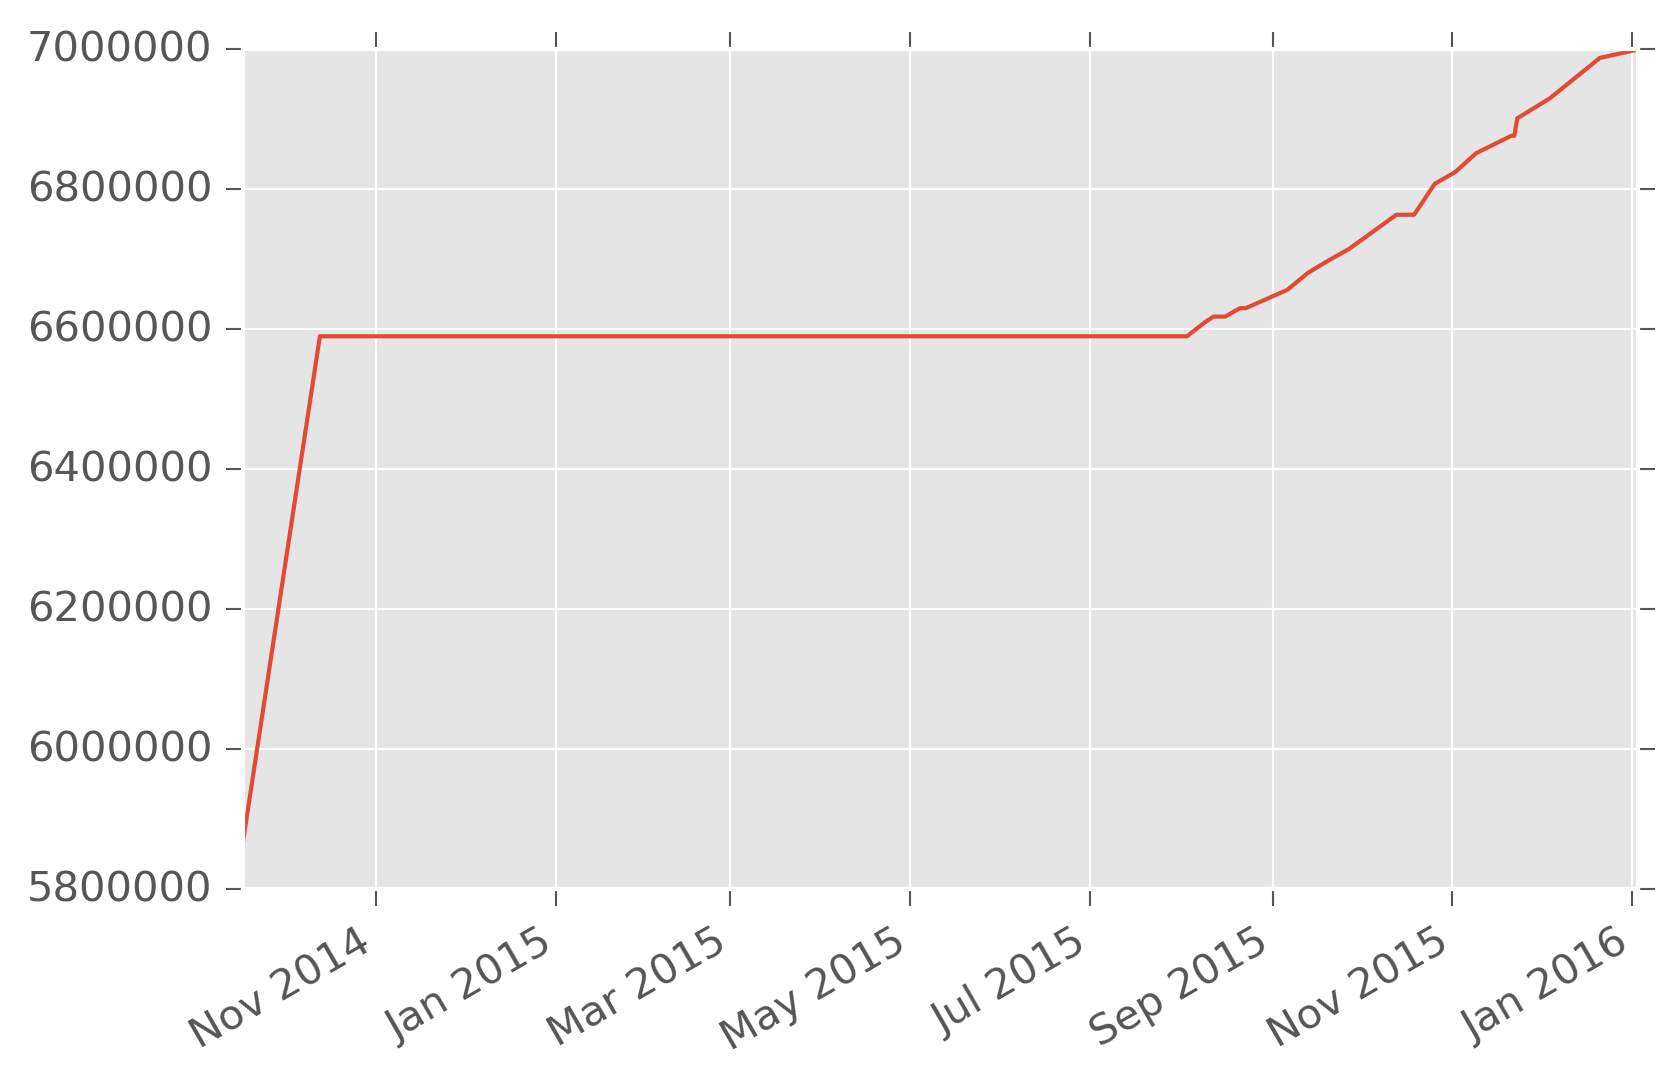

In [14]:
ldf['total'].plot()

In [15]:
ldf['total']

2014-09-17    5869606
2014-10-13    6589799
2015-07-28    6589799
2015-08-03    6589799
2015-08-09    6609617
2015-08-12    6617934
2015-08-16    6617934
2015-08-21    6630052
2015-08-23    6630052
2015-09-06    6656076
2015-09-13    6680340
2015-09-20    6698141
2015-09-27    6714732
2015-10-13    6763390
2015-10-19    6763390
2015-10-26    6807585
2015-11-02    6824561
2015-11-09    6851235
2015-11-21    6876328
2015-11-22    6876328
2015-11-23    6901147
2015-12-04    6929623
2015-12-21    6987464
2016-01-03    6999542
Name: total, dtype: float64

In [16]:
r_total = pd.rolling_mean(ldf['total'], 2, 1)

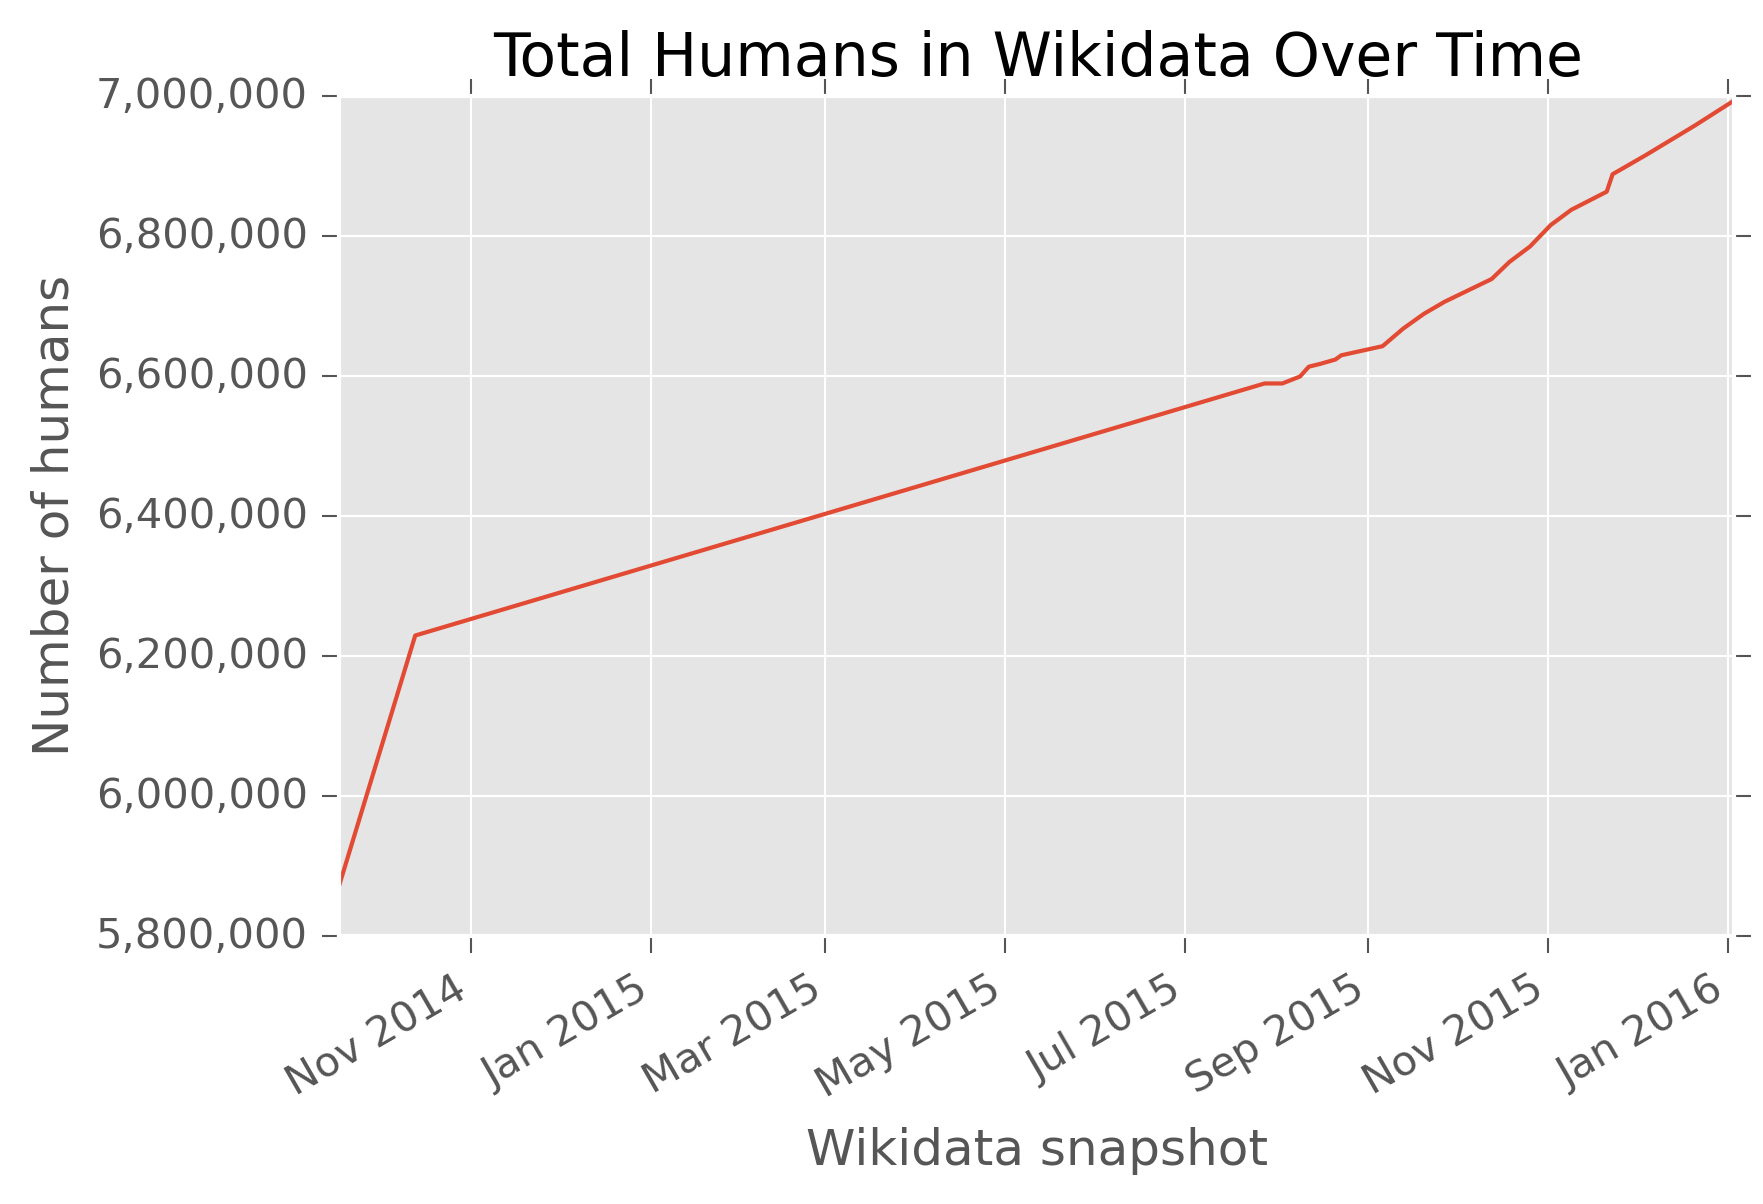

In [328]:
ax = r_total.plot(title="Total Humans in Wikidata Over Time")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Number of humans')
plt.xlabel('Wikidata snapshot')

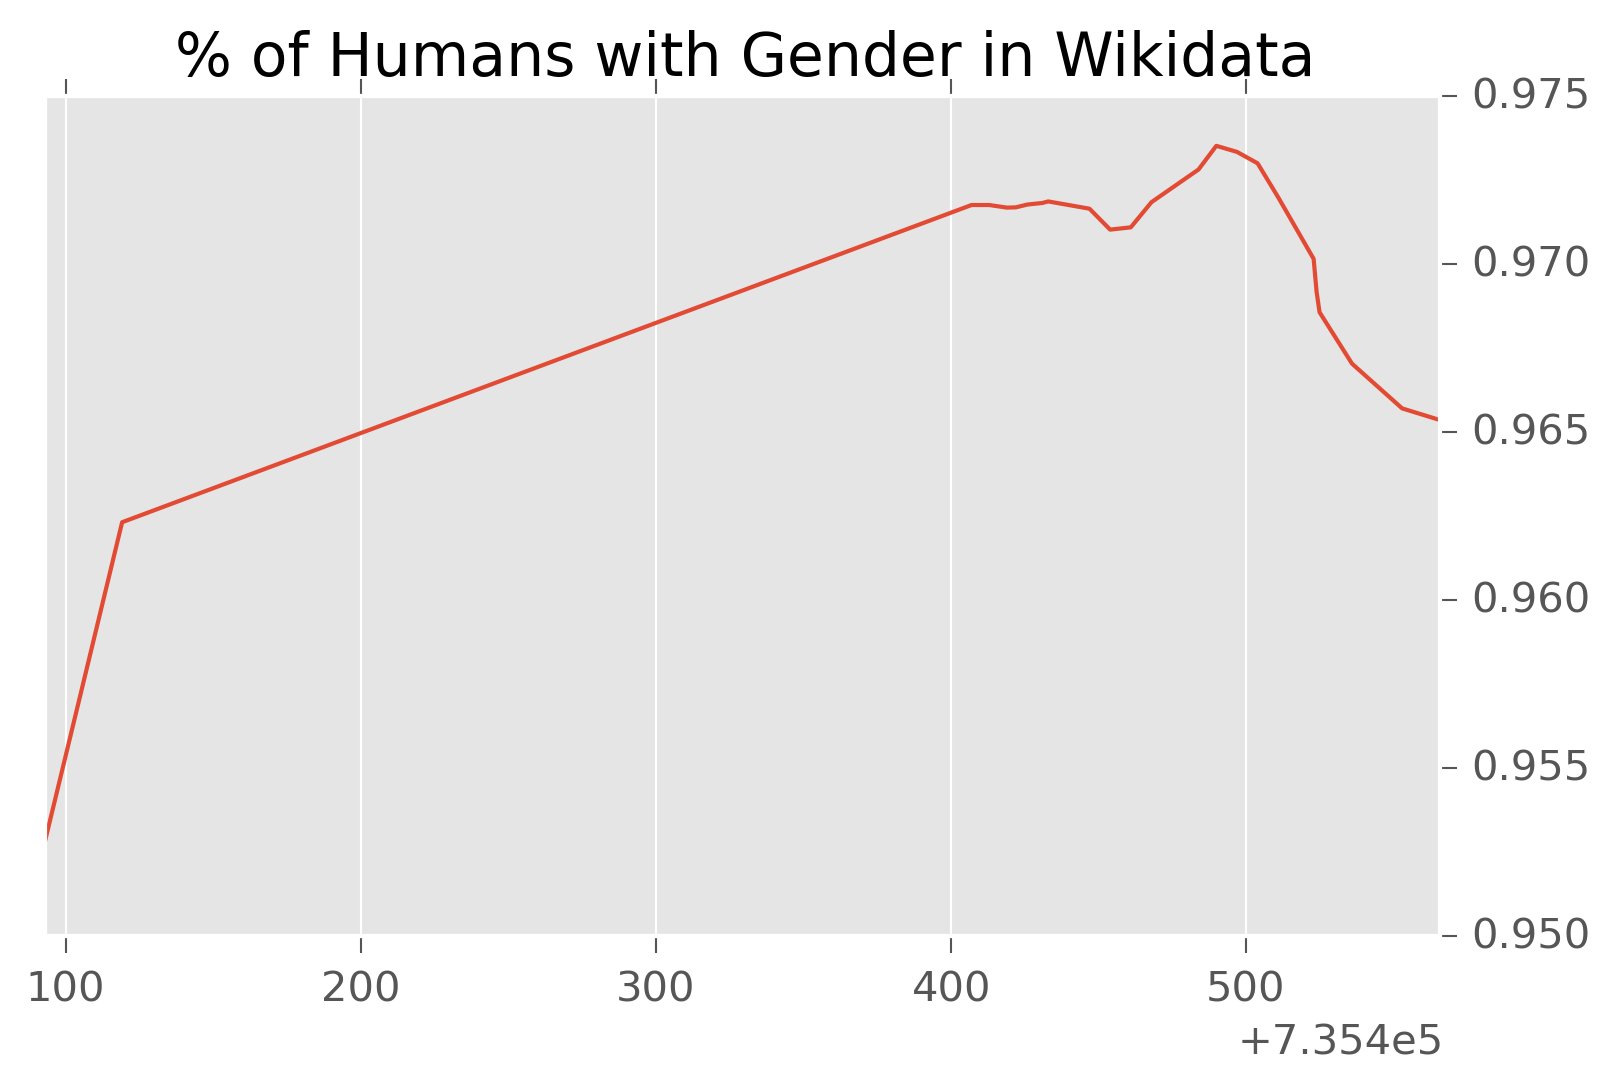

In [402]:
r_gendered = pd.rolling_mean(ldf['gender'], 2, 1)
r_gendered.plot(secondary_y=True, title="% of Humans with Gender in Wikidata")

In [19]:
#populate a dict with numbers:
longitudinal_countrys = {}
longitudinal_citizenships = {}
longitudinal_egs = {}
longitudinal_sites = {}

dict_csv_map = { 'place_of_births-index.csv': longitudinal_countrys,
'citizenships-index.csv' : longitudinal_citizenships,
'ethnic_groups-index.csv': longitudinal_egs,
'site_linkss-index.csv': longitudinal_sites}

for snapdir in snapdirs:
    for csvtype, longitudinal_dict in dict_csv_map.items():
        sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes',csvtype)
        cdf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
        csum = cdf.sum()
        total = csum.sum()
        nothaving = cdf.ix[0].sum()
        having = total - nothaving
        having_per = having / float(total)
        longitudinal_dict[snapdir] = having_per

In [20]:
longitudinal_dobs = {}
longitudinal_dods= {}
longitudinal_occ = {}
longitudinal_fow = {}
dict_csv_map = { 'dod-index.csv': longitudinal_dods,
'dob-index.csv' : longitudinal_dobs,
               'field_of_work-index.csv': longitudinal_fow,
               'occupation-index.csv': longitudinal_occ}

for snapdir in snapdirs:
    bigfname = 'gender-index-data-{}.csv'.format(snapdir)
    bigdf = pd.read_csv(path.join(snapshot_dir,snapdir,bigfname))
    humans =  len(bigdf)
    for csvtype, longitudinal_dict in dict_csv_map.items():
        sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes',csvtype)
        try:
            cdf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
            csum = cdf.sum()
            total = csum.sum()
        except IOError:
            total = 0
        having_per = total/ float(humans)
        longitudinal_dict[snapdir] = having_per

/usr/lib/python3/dist-packages/pandas/io/parsers.py:1150: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [380]:
dobdf = pd.DataFrame.from_dict(longitudinal_dobs,orient='index').fillna(0)
dobdf.columns = ['date of birth']
doddf = pd.DataFrame.from_dict(longitudinal_dods,orient='index').fillna(0)
doddf.columns = ['date of death']
citdf = pd.DataFrame.from_dict(longitudinal_citizenships,orient='index').fillna(0)
citdf.columns = ['citizenship']
countrydf = pd.DataFrame.from_dict(longitudinal_countrys,orient='index').fillna(0)
countrydf.columns = ['place of birth']
egdf = pd.DataFrame.from_dict(longitudinal_egs,orient='index').fillna(0)
egdf.columns = ['ethnic group']
fowdf = pd.DataFrame.from_dict(longitudinal_fow,orient='index').fillna(0)
fowdf.columns = ['field of work']
occdf = pd.DataFrame.from_dict(longitudinal_occ,orient='index').fillna(0)
occdf.columns = ['occupation']
sitedf = pd.DataFrame.from_dict(longitudinal_sites,orient='index').fillna(0)
sitedf.columns = ['at least 1 site link']

In [381]:
aggdf = dobdf.join(doddf).join(citdf).join(countrydf).join(egdf).join(sitedf).join(ldf['gender']).join(fowdf).join(occdf)

In [382]:
aggdf.index = pd.to_datetime(aggdf.index)

In [383]:
aggdf.head(24)

,date of birth,date of death,citizenship,place of birth,ethnic group,at least 1 article,gender,field of work,occupation
2015-11-02,0.700751,0.357170,0.579068,0.294258,0.003605,0.988327,0.972842,0.002568,0.566348
2015-09-13,0.674378,0.343581,0.571644,0.284418,0.003554,0.989358,0.970622,0.002555,0.563043
2015-11-22,0.709272,0.360168,0.575037,0.292995,0.004189,0.986067,0.969182,0.002574,0.567623
2016-01-03,0.717249,0.361488,0.582185,0.305102,0.005559,0.981463,0.965416,0.002573,0.587191
2015-08-09,0.669641,0.338769,0.560887,0.266321,0.003396,0.989634,0.971606,0.002548,0.557724
2015-09-06,0.675439,0.343853,0.572870,0.283842,0.003567,0.989411,0.971435,0.002561,0.565040
2015-08-12,0.669993,0.339033,0.560946,0.266382,0.003559,0.989620,0.971775,0.002551,0.558631
2015-10-13,0.675539,0.347995,0.578089,0.291084,0.003584,0.989097,0.973522,0.002561,0.559922
2015-08-16,0.669993,0.339033,0.560946,0.266382,0.003559,0.989620,0.971775,0.002551,0.558631
2014-10-13,0.740799,0.374148,0.560040,0.266263,0.003391,0.989771,0.971760,0.000000,0.000000


In [384]:
aggdf.ix[[6,5],['gender','date of birth', 'date of death','citizenship','place of birth','ethnic group', 'at least 1 site link']].T

,2015-08-12 00:00:00,2015-09-06 00:00:00
gender,0.971775,0.971435
date of birth,0.669993,0.675439
date of death,0.339033,0.343853
citizenship,0.560946,0.572870
place of birth,0.266382,0.283842
ethnic group,0.003559,0.003567
at least 1 site link,NaN,NaN


In [385]:
print(aggdf.ix[[6,5],['gender','date of birth', 'date of death','citizenship','place of birth','ethnic group','field of work','occupation', 'at least 1 site link']].T.to_latex(float_format=lambda x: "{0:.1f}%".format(x*100)))

\begin{tabular}{lrr}
\toprule
{} &  2015-08-12 &  2015-09-06 \\
\midrule
gender               &       97.2\% &       97.1\% \\
date of birth        &       67.0\% &       67.5\% \\
date of death        &       33.9\% &       34.4\% \\
citizenship          &       56.1\% &       57.3\% \\
place of birth       &       26.6\% &       28.4\% \\
ethnic group         &        0.4\% &        0.4\% \\
field of work        &        0.3\% &        0.3\% \\
occupation           &       55.9\% &       56.5\% \\
at least 1 site link &        nan\% &        nan\% \\
\bottomrule
\end{tabular}



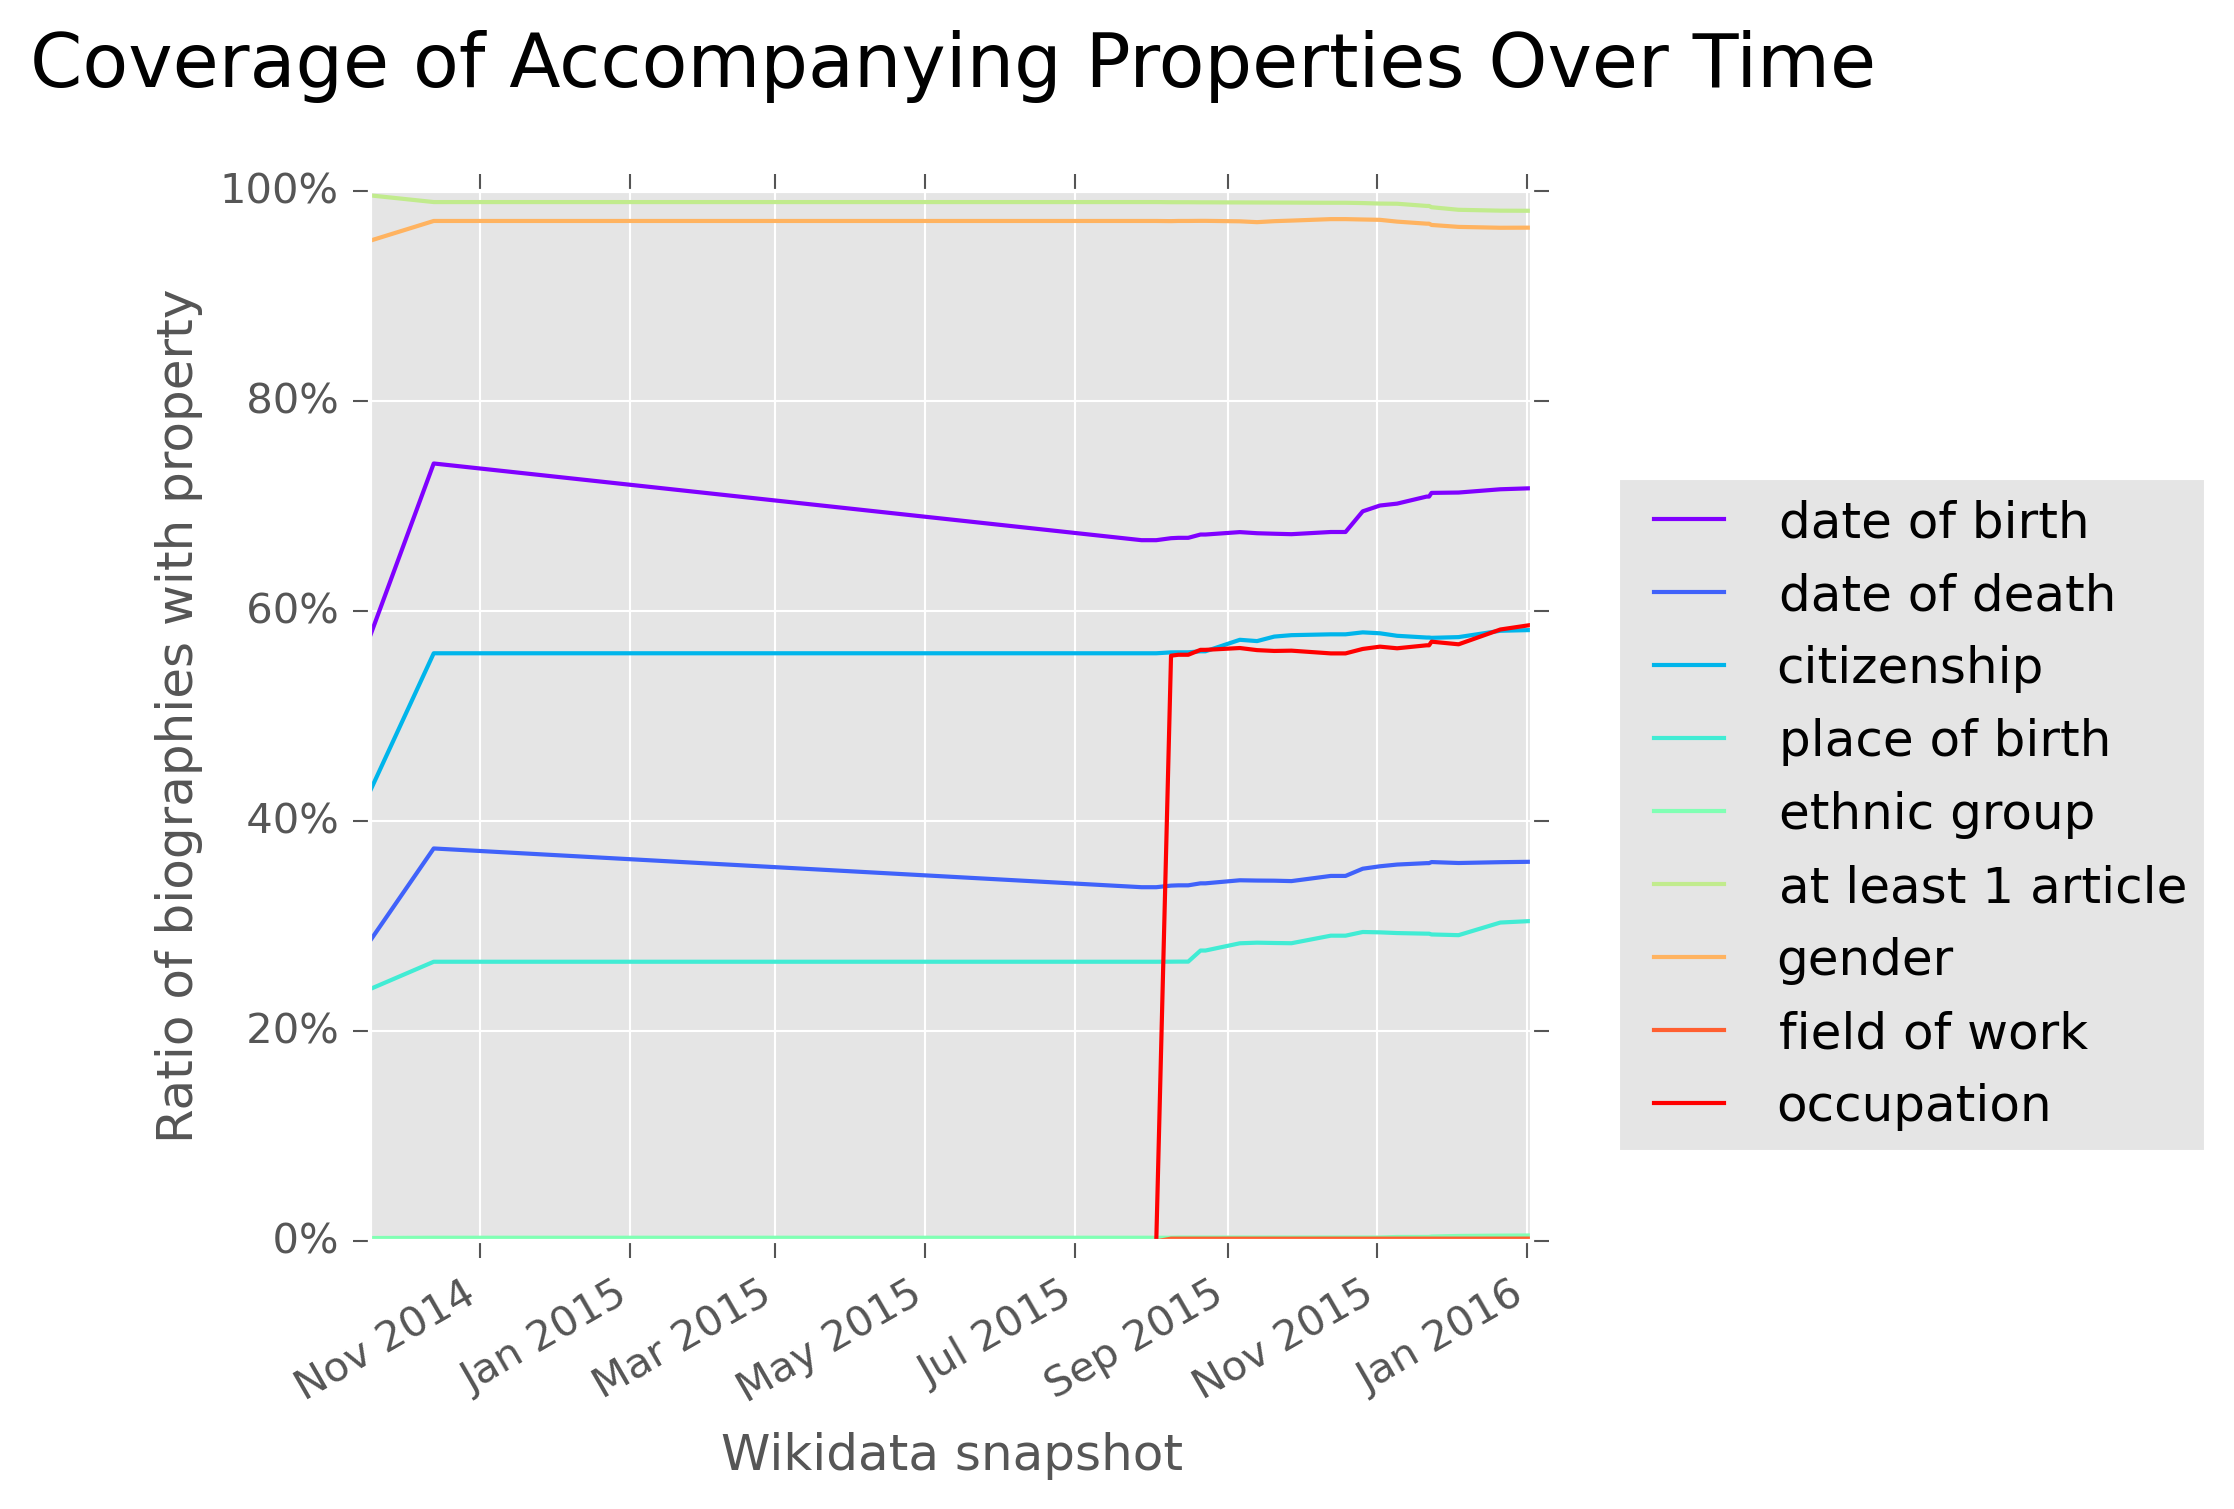

In [386]:
r_aggdf = pd.rolling_mean(aggdf, 2,1)
ax = aggdf.plot( figsize = (5,5), colormap=plt.cm.rainbow)
title("Coverage of Accompanying Properties Over Time", y = 1.08,size=18)
legend(bbox_to_anchor=(1.6,0.75))
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.ylabel('Ratio of biographies with property')
plt.xlabel('Wikidata snapshot')

# FRB over time

In [28]:
ldf['female%'] = ldf['female'] / ldf['total']

In [29]:
ldf['nonbinary'] = ldf['total'] - ldf['female'] - ldf['male']
ldf['nonbinary%'] = ldf['nonbinary'] / ldf['total']

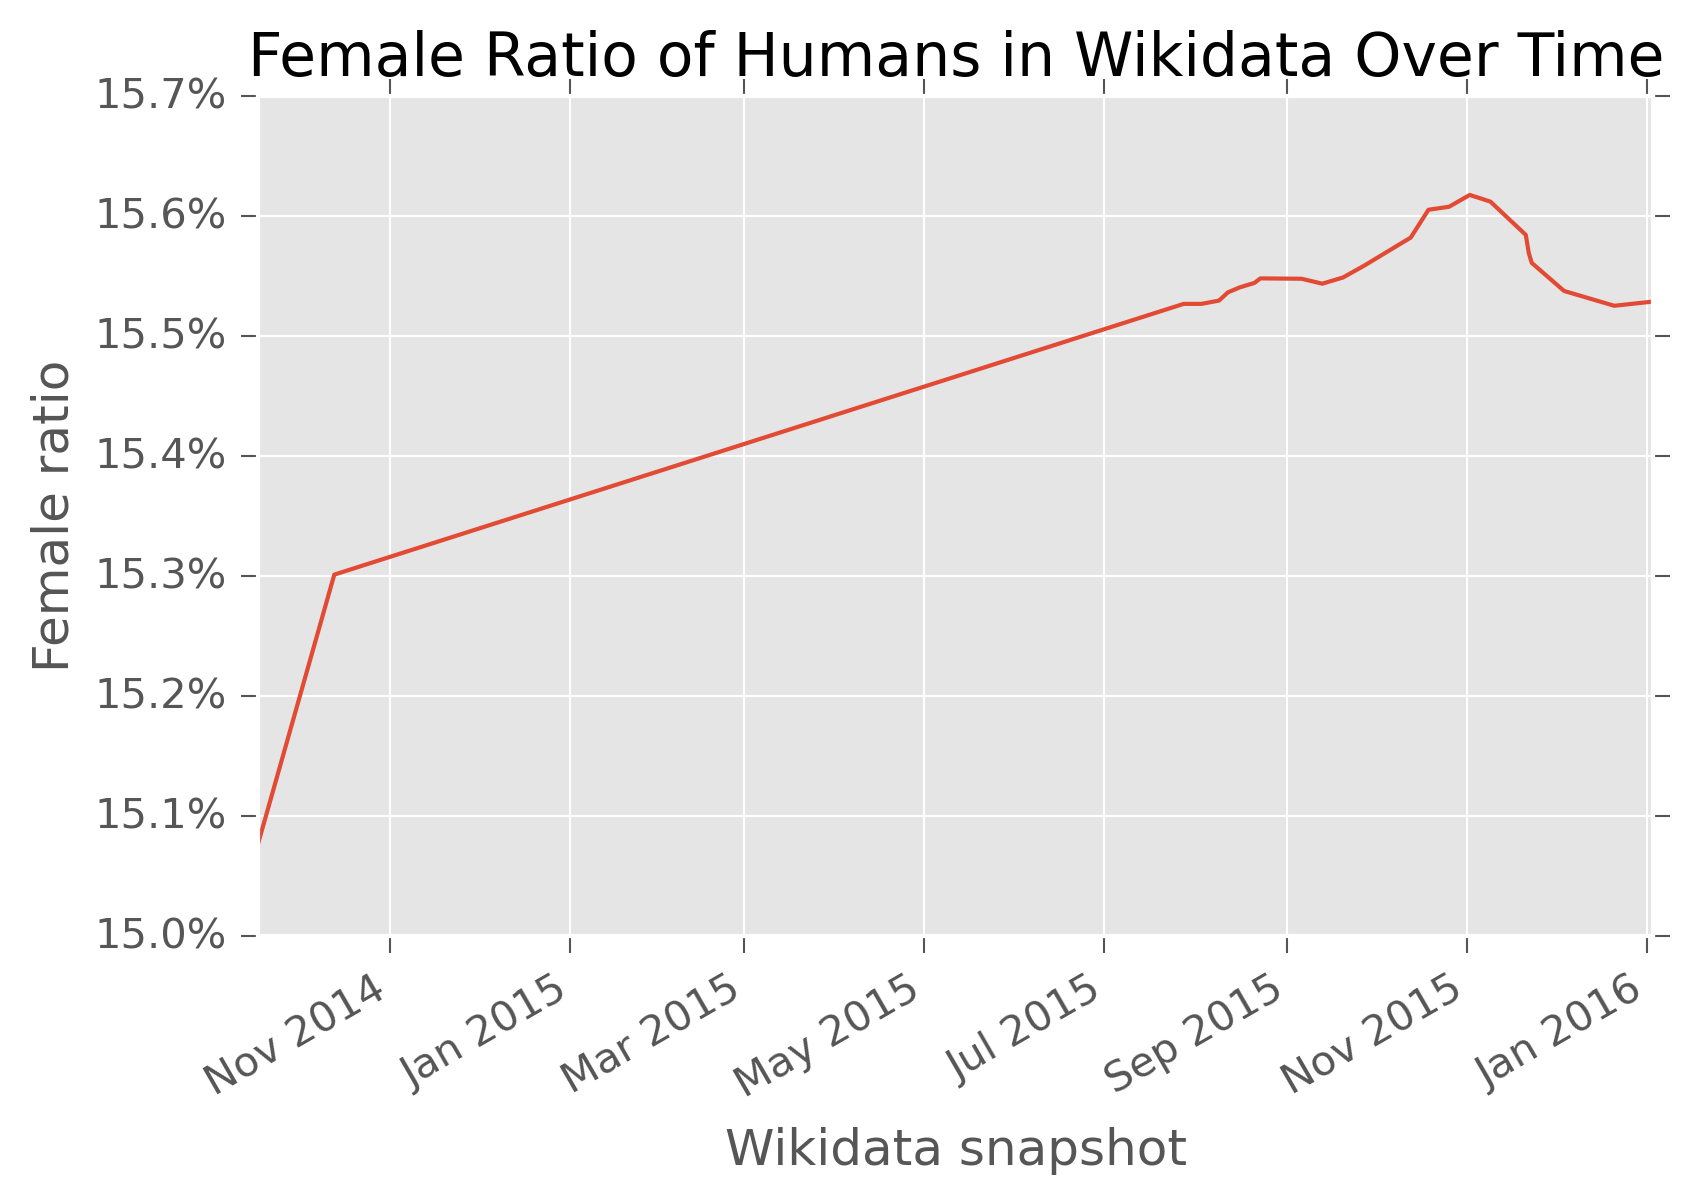

In [330]:
r_femper = pd.rolling_mean(ldf['female%'], 2, 1)
ax =r_femper.plot()
title('Female Ratio of Humans in Wikidata Over Time')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
plt.ylabel('Female ratio')
plt.xlabel('Wikidata snapshot')

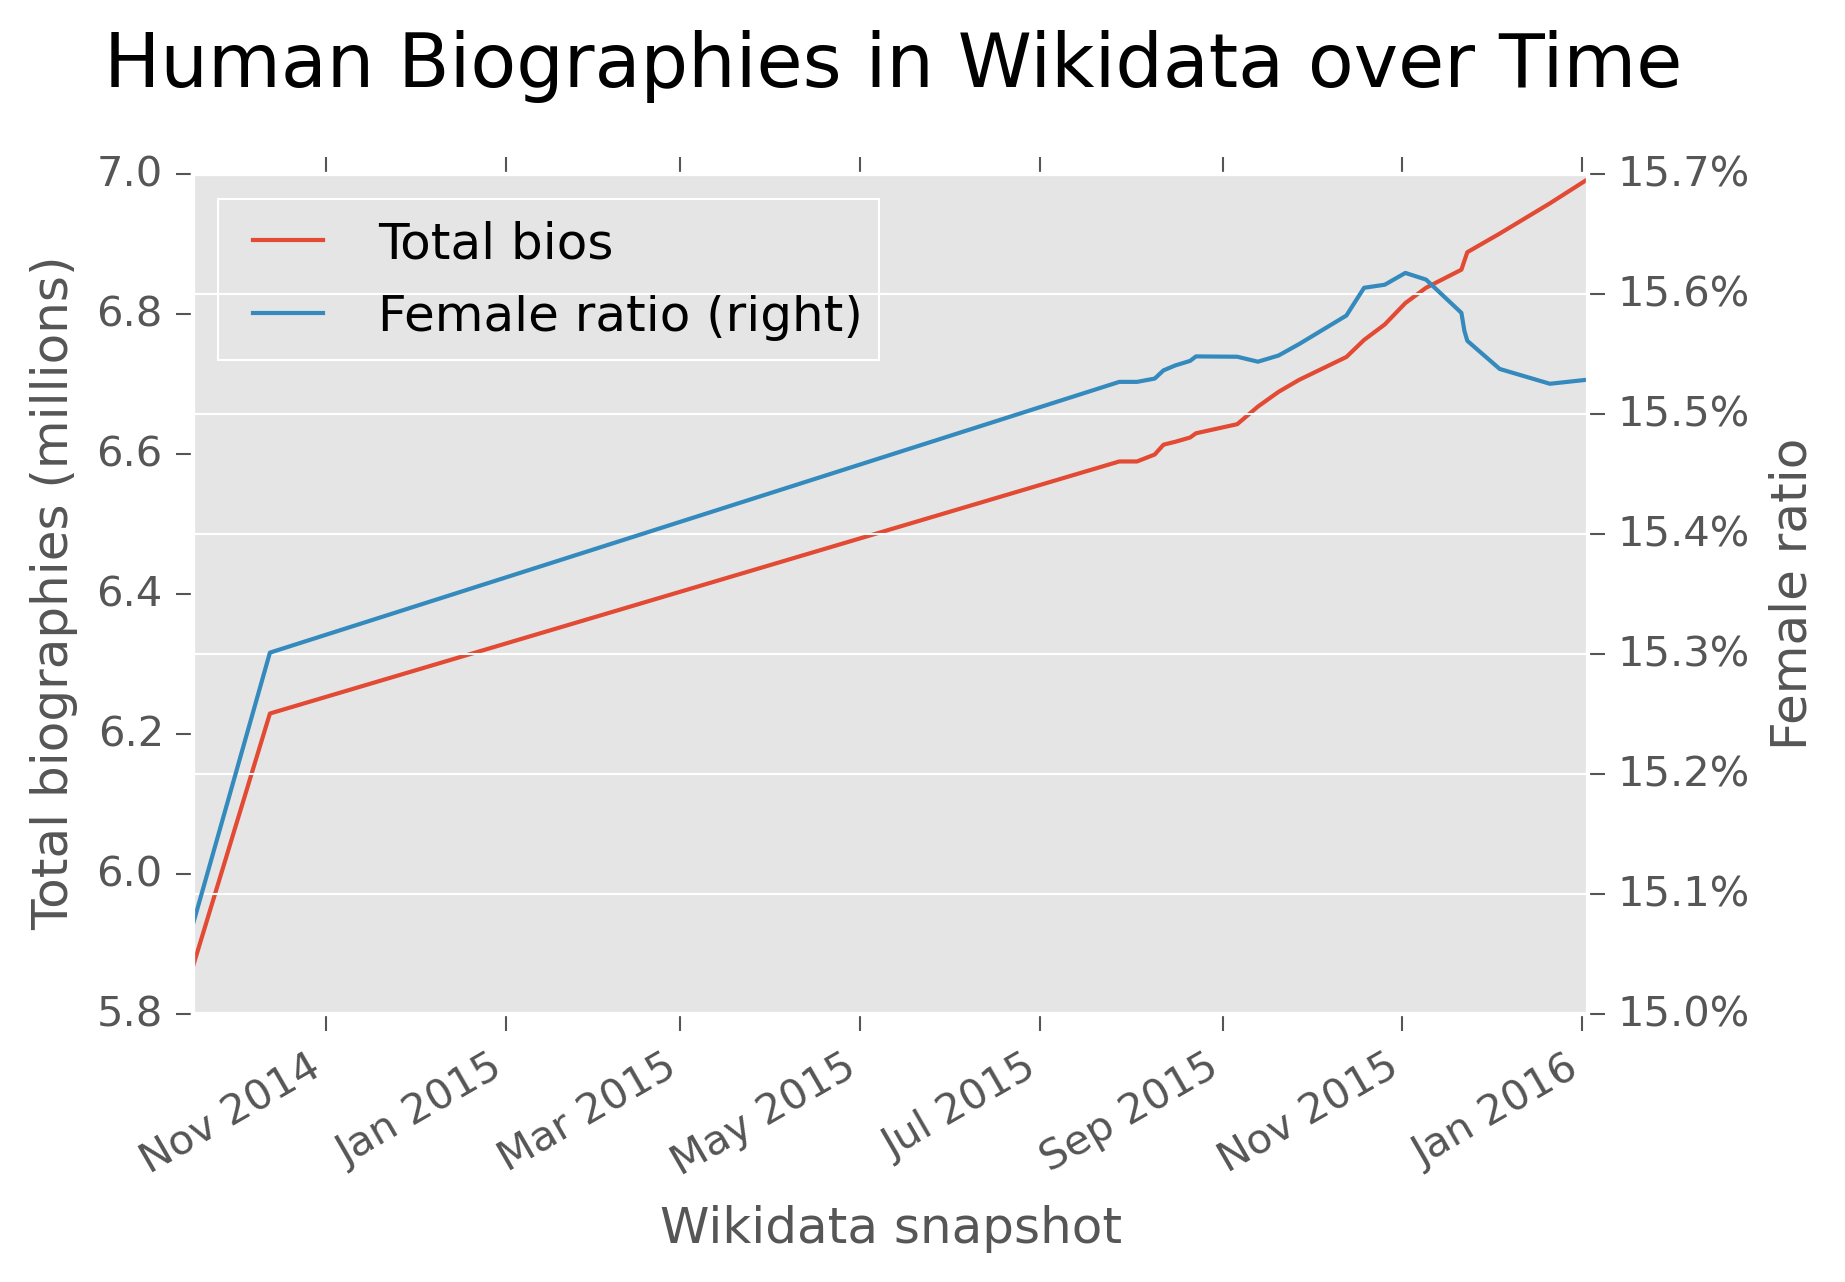

In [444]:
twoseries = pd.concat([r_total, r_femper], axis=1)
twoseries.columns = ['Total bios', 'Female ratio']
ax = twoseries.plot(secondary_y=['Female ratio'],figsize=(6,4))
ax.set_xlabel('Wikidata snapshot')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: x/1000000))
ax.set_ylabel('Total biographies (millions)')
ax.right_ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in ax.right_ax.get_yticks()])
ax.right_ax.set_ylabel('Female ratio')
plt.title('Human Biographies in Wikidata over Time',y = 1.08,size=18)

In [31]:
ldf['time'] = ldf.index

In [32]:
ldf['timesince'] = ldf['time'] - ldf['time'].ix[0]

In [33]:
ldf['dayssince'] = ldf['timesince'].dt.days

In [34]:
#from pandas.stats.api import ols
#result = ols(y=ldf['female%'], x=ldf['dayssince'])

In [35]:
ldf['femper'] = ldf['female%']
ldf['constant'] = 1

In [36]:
#import statsmodels.formula.api as sm
#smresult = sm.ols(formula="femper ~ dayssince", data=ldf).fit()

In [37]:
#smresult.summary()

In [38]:
#populate a dict with numbers:
longitudinal_langs = {}
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    sldf['total'] = sldf.sum(axis=1)
    sldf['femper'] = sldf['female'] / sldf['total']
    retseries = sldf['femper'][sldf['total']>100000]
    longitudinal_langs[snapdir] = retseries

In [39]:
langdf = pd.DataFrame.from_dict(longitudinal_langs, orient='index')

In [40]:
langdf.dropna(axis=1, how='any', inplace=True)

In [41]:
langdf

,dewiki,enwiki,eswiki,fiwiki,frwiki,itwiki,jawiki,nlwiki,nowiki,plwiki,ptwiki,ruwiki,svwiki,zhwiki
2014-09-17,0.149411,0.154439,0.158812,0.159695,0.151706,0.143675,0.126048,0.155467,0.199618,0.155391,0.160003,0.135623,0.197613,0.137898
2014-10-13,0.150655,0.157080,0.165257,0.172855,0.153639,0.145269,0.174524,0.160288,0.204345,0.153818,0.163643,0.136425,0.198135,0.136322
2015-07-28,0.150655,0.157080,0.165257,0.172855,0.153639,0.145269,0.174524,0.160288,0.204345,0.153818,0.163643,0.136425,0.198135,0.136322
2015-08-03,0.150655,0.157080,0.165257,0.172855,0.153639,0.145269,0.174524,0.160288,0.204345,0.153818,0.163643,0.136425,0.198135,0.136322
2015-08-09,0.150725,0.156740,0.165606,0.172678,0.153615,0.145325,0.174614,0.160279,0.204307,0.153780,0.163508,0.136546,0.198180,0.136776
2015-08-12,0.150796,0.156791,0.165613,0.172671,0.153971,0.145331,0.174670,0.160253,0.204418,0.153765,0.163371,0.136678,0.198229,0.136972
2015-08-16,0.150796,0.156791,0.165613,0.172671,0.153971,0.145331,0.174670,0.160253,0.204418,0.153765,0.163371,0.136678,0.198229,0.136972
2015-08-21,0.150881,0.156708,0.165541,0.172636,0.153999,0.145287,0.174978,0.160219,0.204455,0.153742,0.163389,0.136647,0.198234,0.137294
2015-08-23,0.150881,0.156708,0.165541,0.172636,0.153999,0.145287,0.174978,0.160219,0.204455,0.153742,0.163389,0.136647,0.198234,0.137294
2015-09-06,0.150958,0.156835,0.165377,0.172876,0.153993,0.145247,0.174302,0.160349,0.204367,0.153490,0.163401,0.136669,0.198290,0.137378


In [42]:
langdf.index = pd.to_datetime(langdf.index)

In [43]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

In [291]:
import json
wikicodes = json.load(open('/home/notconfusing/workspace/WIGI/helpers/wiki_code_map.json','r'))
def lookup_wikicode(wikicode):
    letters = wikicode.split('wiki')[0]
    fullname = wikicodes[letters]
    shortname = fullname.split(' ')[0]
    return shortname
lookup_wikicode('enwiki')

'English'

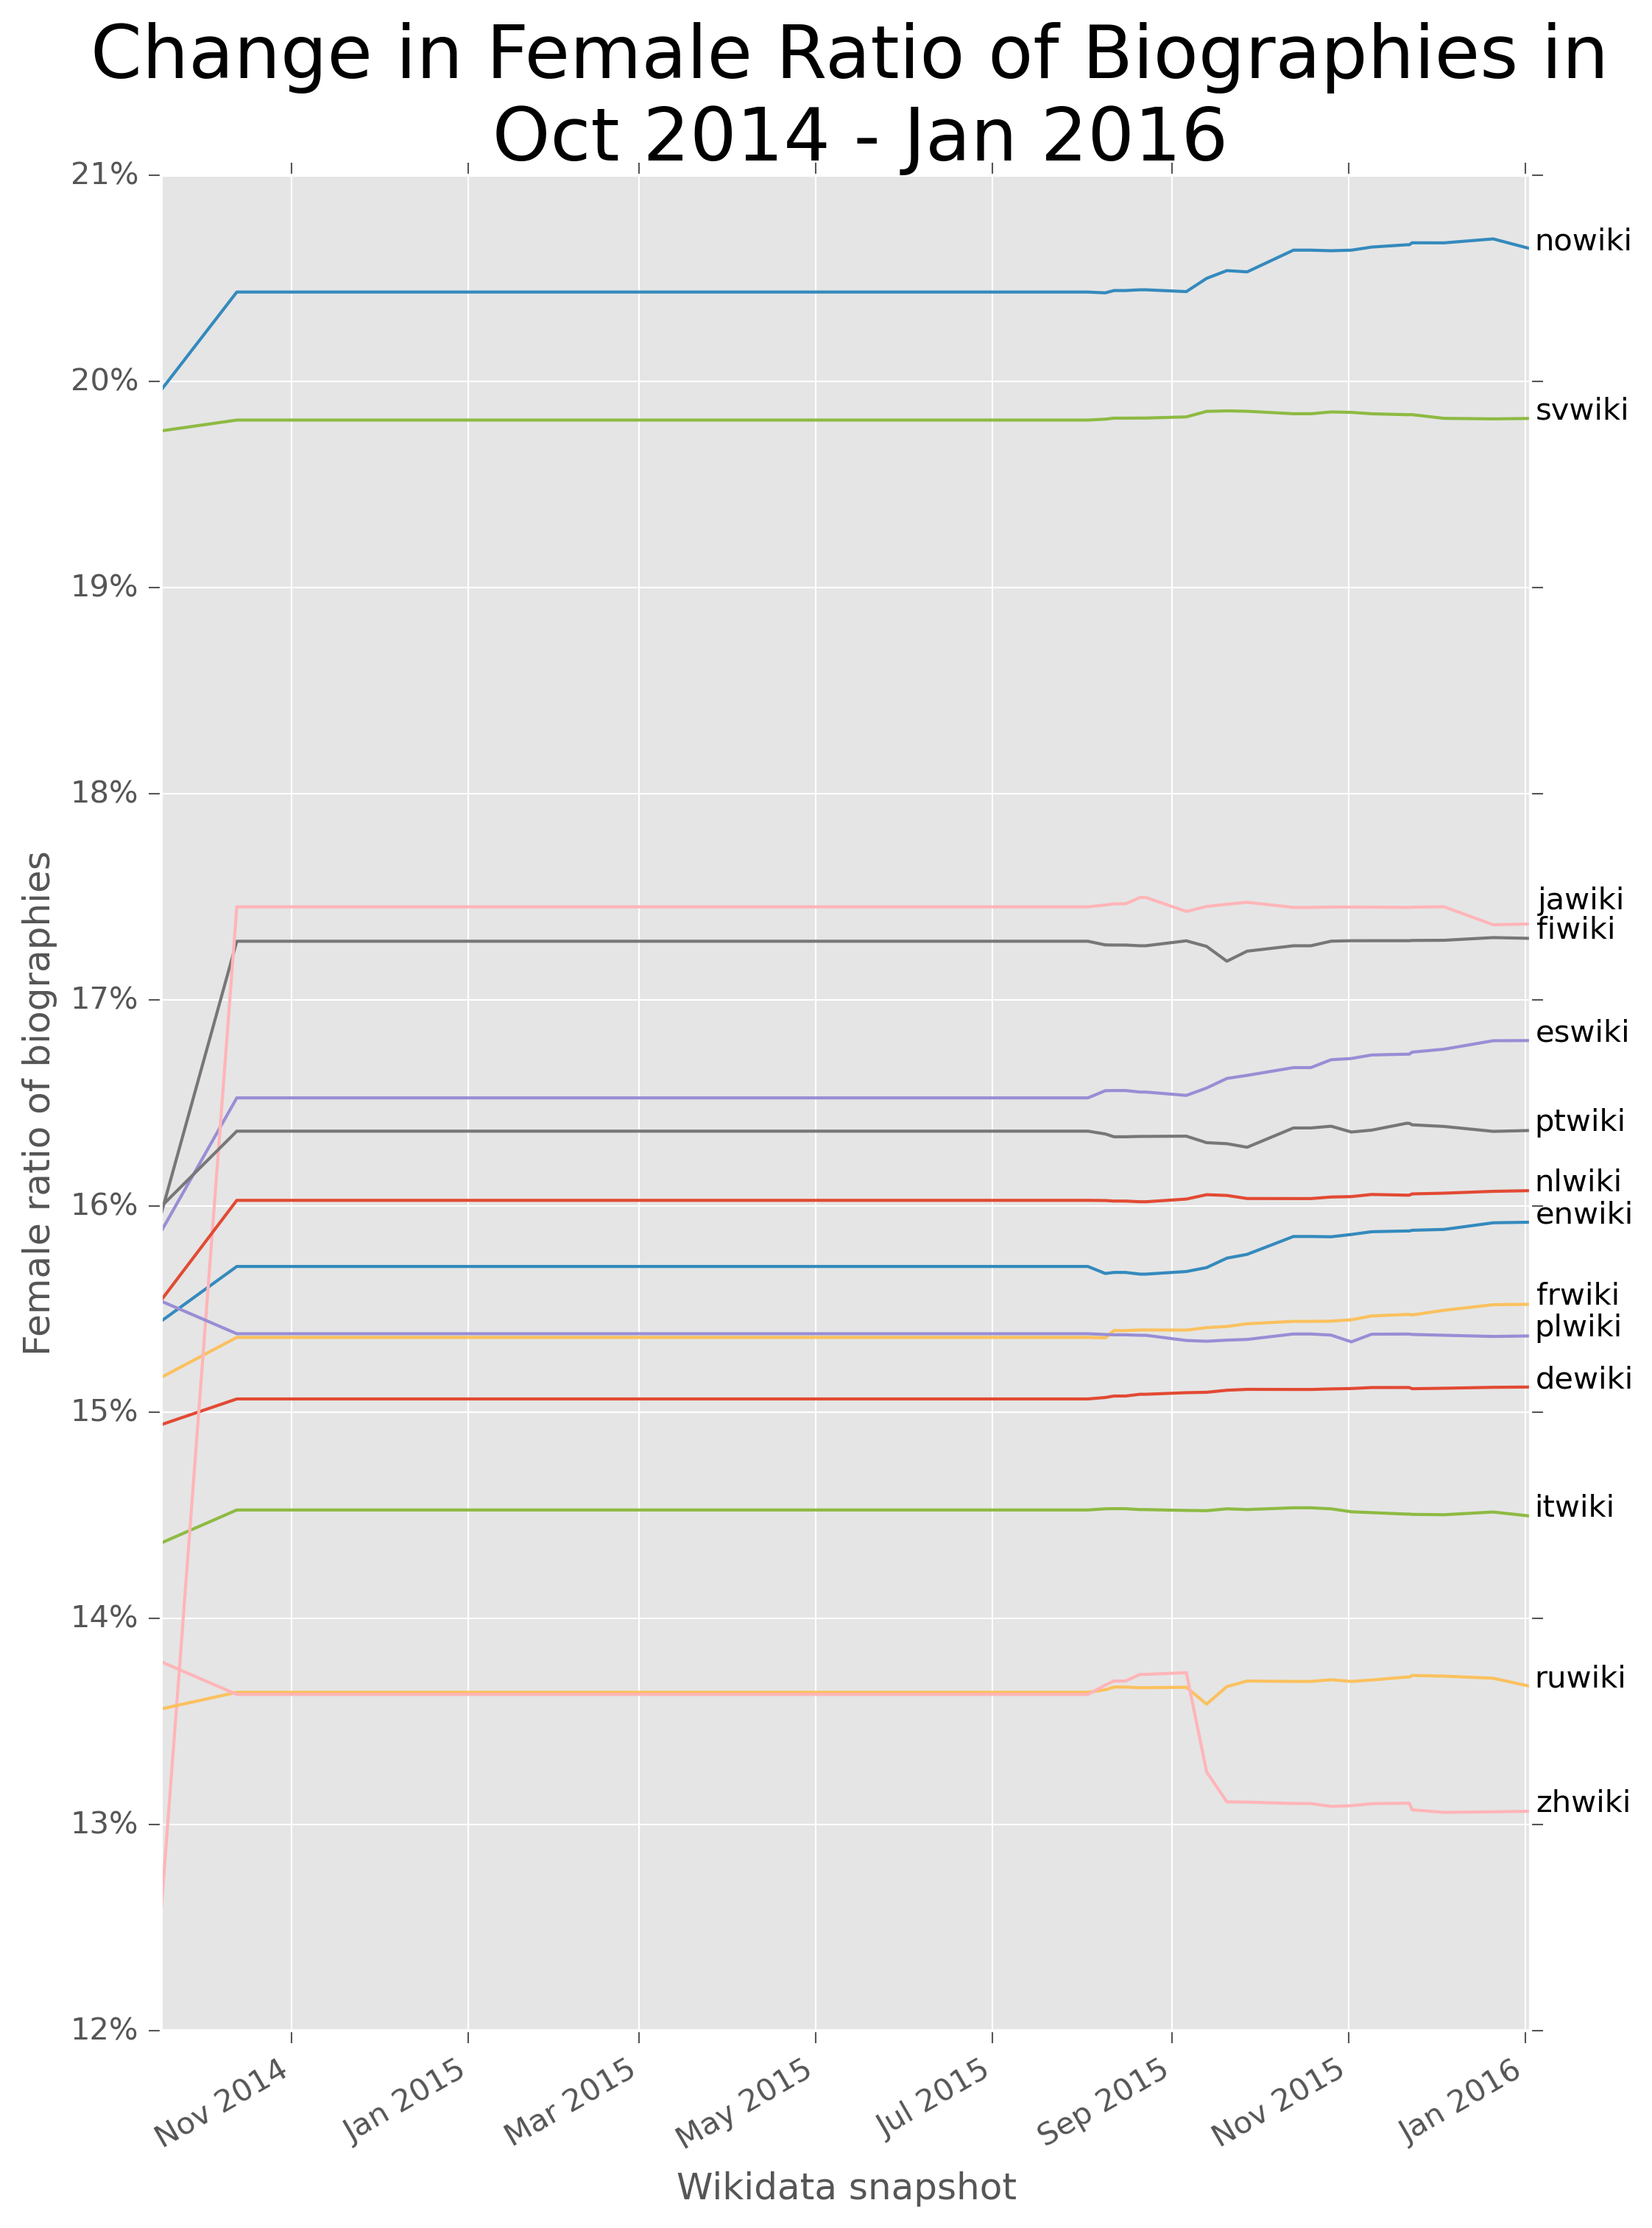

In [44]:
ax = langdf.plot(legend=False, figsize=(8,12))
for wiki in langdf:
    offset=5 if wiki == 'jawiki' else 0
    ax.annotate(wiki, (langdf.index[-1],langdf[wiki].ix['2016-01-03']), xytext=(2, 0+offset), 
                textcoords='offset points')
    #plt.text(langdf.index[-1],langdf[wiki].ix['2016-01-03'], wiki, fontdict=font)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y,pos: ('{0:.2f}'.format(y*100)).rstrip('0').rstrip('.')+'%'))
plt.ylabel('Female ratio of biographies')
plt.xlabel('Wikidata snapshot')
plt.title('Change in Female Ratio of Biographies in \n Oct 2014 - Jan 2016',size=24)
plt.show()


In [317]:
del langdf['months']

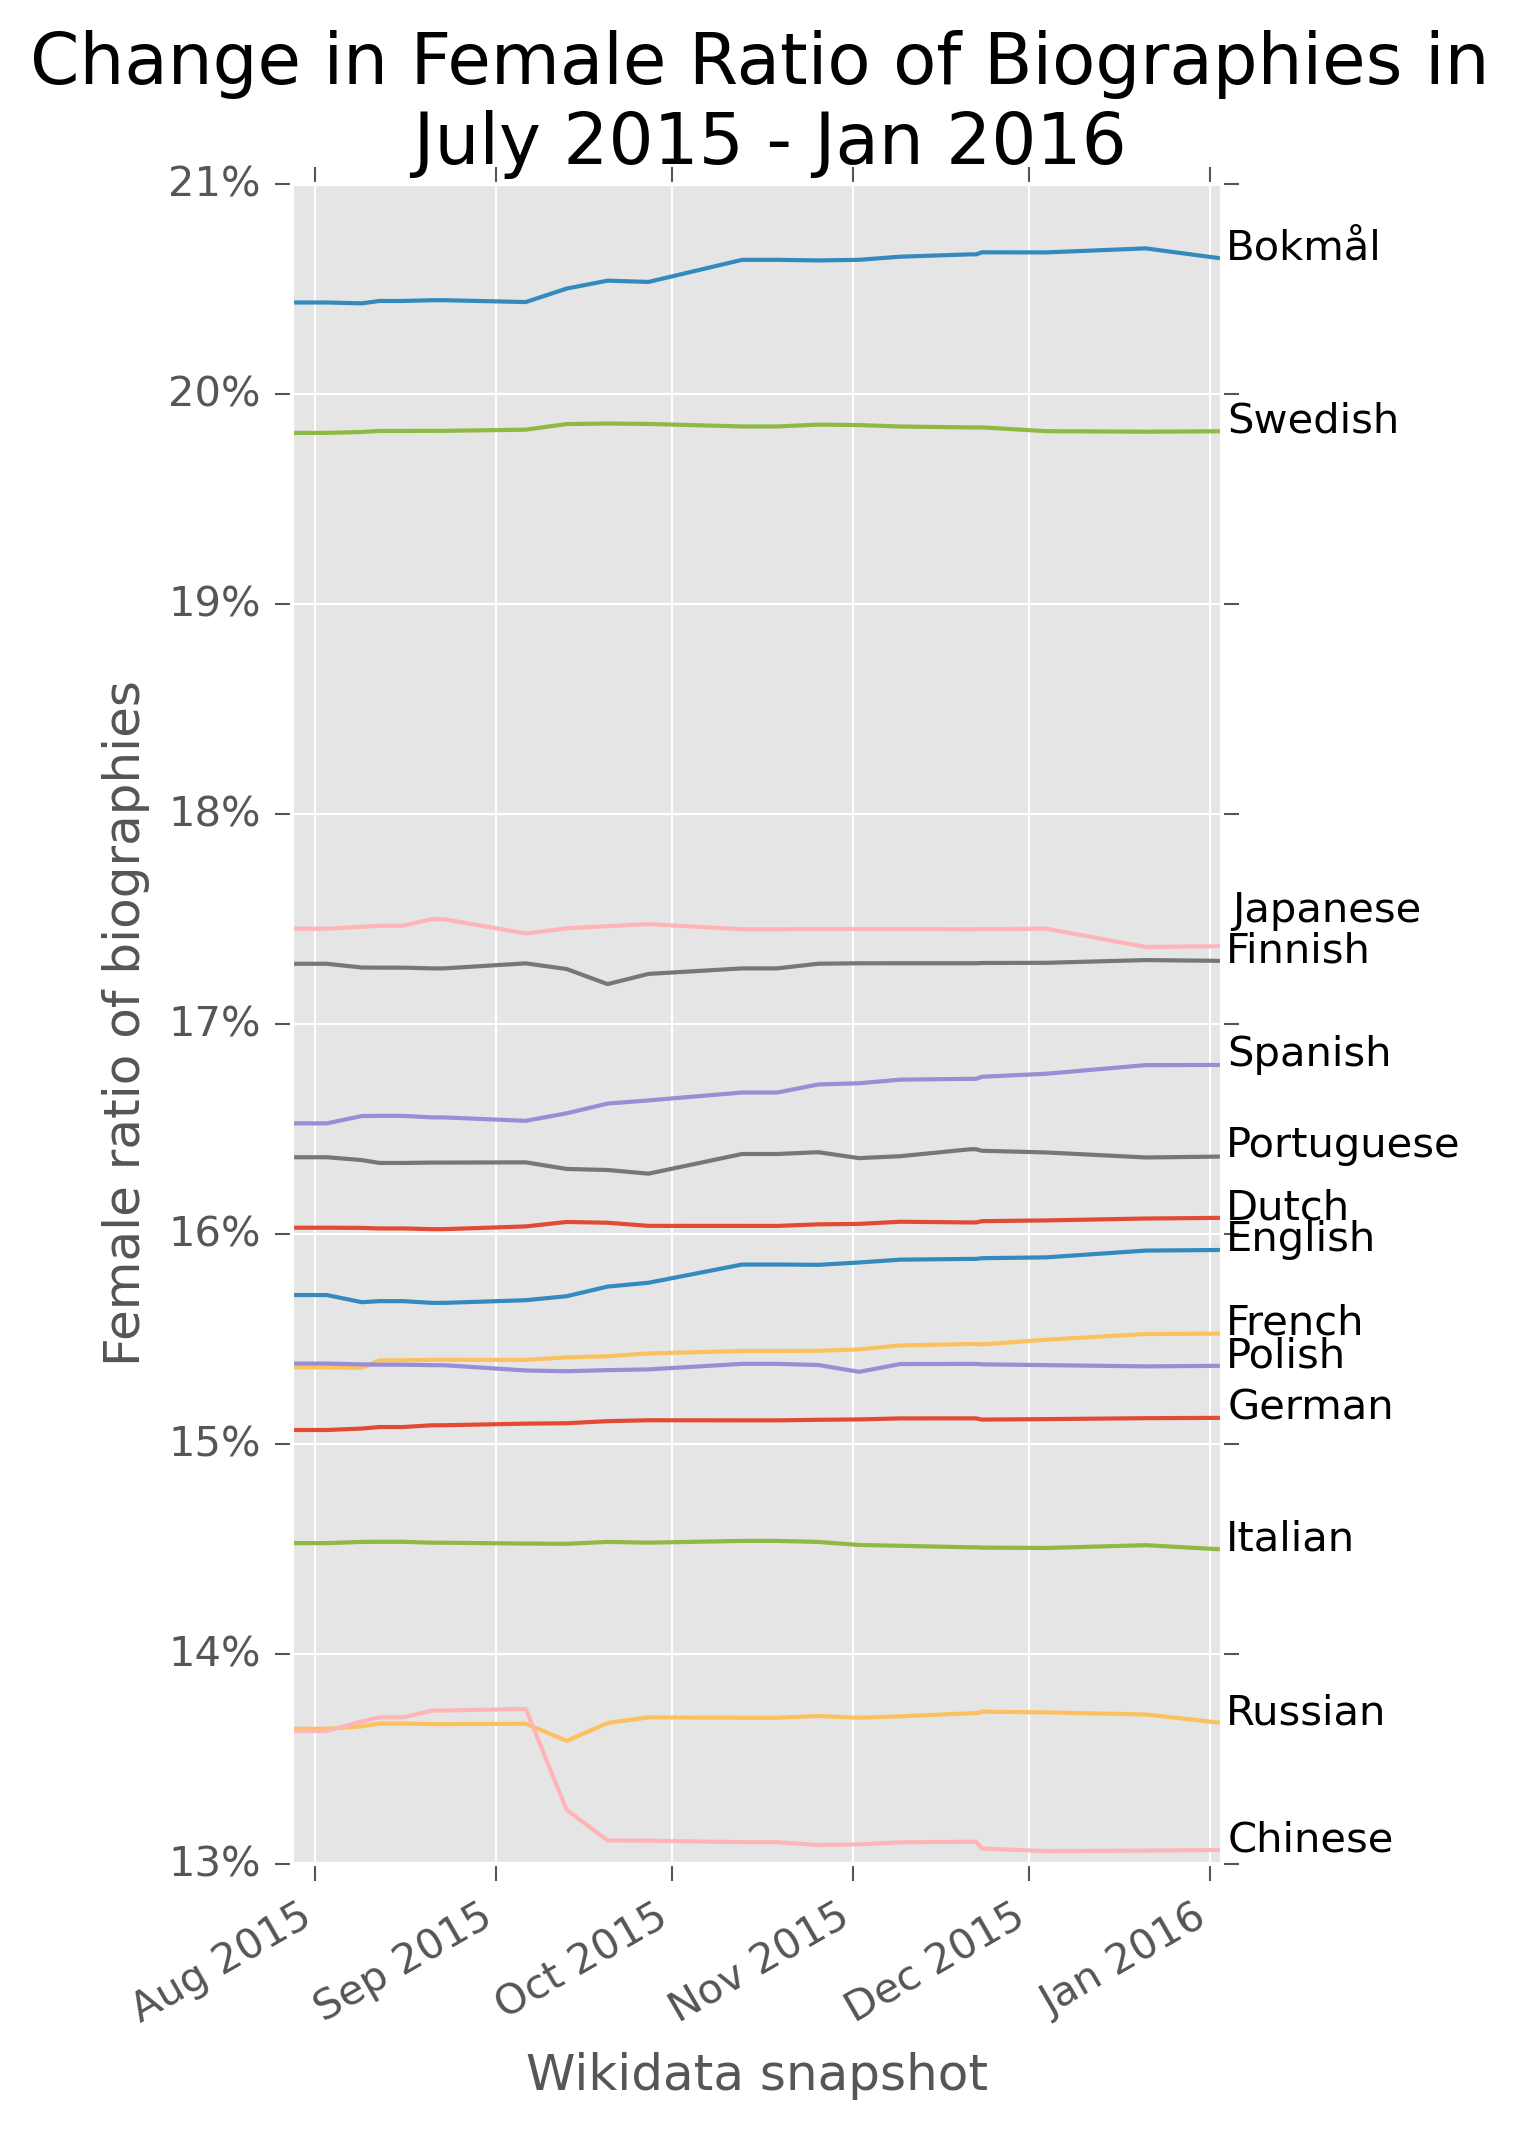

In [377]:
endsorted = pd.DataFrame(langdf.ix[end]).sort(columns=['2016-01-03 00:00:00'])
oddeven = {wiki: pos % 2 for pos, wiki in list(enumerate(endsorted.index))}

begin, end = '2015-07-28', '2016-01-03'

ax = langdf.ix[begin:end].plot(legend=False, figsize=(4,8))
for wiki in langdf:
    side = begin if oddeven[wiki] == 0 else end
    offset = 6 if wiki == 'jawiki' else 0
    ax.annotate(lookup_wikicode(wiki), (end ,langdf[wiki].ix[end]), xytext=(2, 0+offset), 
                textcoords='offset points')
    #plt.text(langdf.index[-1],langdf[wiki].ix['2016-01-03'], wiki, fontdict=font)
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y,pos: ('{0:.2f}'.format(y*100)).rstrip('0').rstrip('.')+'%'))
plt.ylabel('Female ratio of biographies')
plt.xlabel('Wikidata snapshot')
plt.title('Change in Female Ratio of Biographies in \n July 2015 - Jan 2016',size=17)
plt.show()


In [45]:
#populate a dict with numbers:
long_fem_per = {}
long_tot = {}
for snapdir in [min(snapdirs), max(snapdirs)]:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    sldf['total'] = sldf.sum(axis=1)
    sldf['femper'] = sldf['female'] / sldf['total']
    femperseries = sldf['femper'][sldf['total']>100000]
    totalseries = sldf['total'][sldf['total']>100000]
    long_fem_per[snapdir] = femperseries
    long_tot[snapdir] = totalseries

In [46]:
femperdf = pd.DataFrame.from_dict(long_fem_per)
totaldf = pd.DataFrame.from_dict(long_tot)

In [47]:
arrowdf =femperdf.join(totaldf, lsuffix='femper', rsuffix='total').T

In [48]:
arrowdf = arrowdf.T.dropna(how='any').T

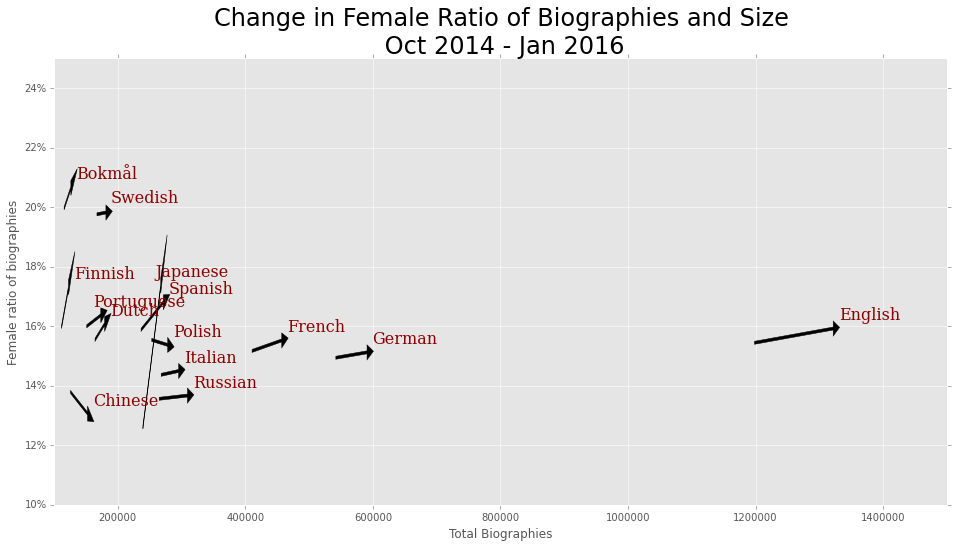

In [297]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

for wiki in arrowdf:
    plt.arrow(arrowdf[wiki].ix[2],  #x1
              arrowdf[wiki].ix[0],  # y1
              arrowdf[wiki].ix[3]-arrowdf[wiki].ix[2], # x2 - x1
              arrowdf[wiki].ix[1]-arrowdf[wiki].ix[0], # y2 - y1
             head_width=0.005, head_length=10000, fc='k', ec='k')
    offset = 10000 if wiki not in ['jawiki','ptwiki'] else -10000
    plt.text(arrowdf[wiki].ix[3]+offset, arrowdf[wiki].ix[1]**0.99, lookup_wikicode(wiki), fontdict=font)
plt.ylim(0.10, 0.25)
plt.ylabel("Female ratio of biographies")
plt.xlim(100000,1500000)
plt.xlabel("Total Biographies")
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y,pos: ('{0:.2f}'.format(y*100)).rstrip('0').rstrip('.')+'%'))
#plt.yscale('log')
plt.title('Change in Female Ratio of Biographies and Size \n Oct 2014 - Jan 2016', size=24)


In [159]:
#populate a dict with numbers:
eng_fem_totals = {}
all_fem_totals ={}
for snapdir in snapdirs:
    sitelinkspath = path.join(snapshot_dir,snapdir,'property_indexes','site_linkss-index.csv')
    sldf = pd.read_csv(sitelinkspath,index_col=0).fillna(0)
    eng_fem = sldf.ix['enwiki']['female']
    all_fem = sldf['female'].sum()
    snapdate = pd.to_datetime(snapdir)
    eng_fem_totals[snapdate] = eng_fem
    all_fem_totals[snapdate] = all_fem

engfemdf = pd.DataFrame.from_dict(eng_fem_totals,orient='index').fillna(0)
engfemdf.columns = ['eng_fems']
engfemdf = engfemdf.sort_index()

allfemdf = pd.DataFrame.from_dict(all_fem_totals,orient='index').fillna(0)
allfemdf.columns = ['all_fems']
allfemdf = allfemdf.sort_index()

In [161]:
engfemdf['added']= engfemdf['eng_fems']-engfemdf['eng_fems'].shift()
allfemdf['added']= allfemdf['all_fems']-allfemdf['all_fems'].shift()

In [252]:
engfemdf['month'] = engfemdf.index.map(lambda x: x.month if x.year == 2015 else 0)
allfemdf['month'] = allfemdf.index.map(lambda x: x.month if x.year == 2015 else 0)

In [253]:
eng_months = engfemdf.groupby('month')
all_months = allfemdf.groupby('month')

In [254]:
wd_eng_months = eng_months.sum().ix[8:12]
wd_all_months = all_months.sum().ix[8:12]

In [255]:
wir_data = {8:1854, 9:1590,10:1989,11:1787,12:1473}
wir_months = pd.DataFrame.from_dict(wir_data, orient='index')
wir_months.columns=['added']

In [256]:
addeddf = wir_months.join(wd_eng_months,lsuffix='wir',rsuffix='wd')
alladdeddf= wir_months.join(wd_all_months,lsuffix='wir',rsuffix='wd')

In [257]:
del addeddf['eng_fems']
del alladdeddf['all_fems']

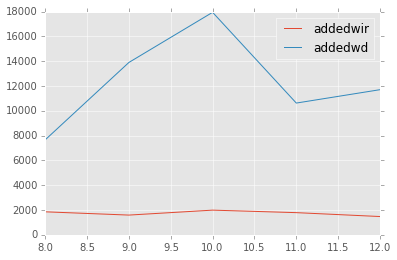

In [258]:
alladdeddf.plot()

In [259]:
addeddf.corr()

,addedwir,addedwd
addedwir,1.000000,0.083634
addedwd,0.083634,1.000000


In [260]:
alladdeddf.corr()

,addedwir,addedwd
addedwir,1.000000,0.225557
addedwd,0.225557,1.000000


In [263]:
smooth = pd.rolling_mean(alladdeddf, window=2, min_periods=2).dropna()

In [264]:
slope, intercept, r_value, p_value, std_er = linregress(smooth['addedwir'],smooth['addedwd'])
print(r_value, p_value)

0.707914528975 0.292085471025


In [225]:
np.correlate(addeddf['addedwir'],addeddf['addedwd'])

array([ 48040039.])

In [226]:
from scipy.stats import linregress

In [229]:
slope, intercept, r_value, p_value, std_er = linregress(alladdeddf['addedwir'],alladdeddf['addedwd'])

In [230]:
r_value, p_value

(0.65749642520471696, 0.22785224154155839)

In [307]:
def mon2015(x):
    dt = pd.to_datetime(x)
    return x.month if x.year == 2015 else 0

enwiki['months'] = langdf.index.map(mon2015)

enmons = .groupby(by='months')

AssertionError: Grouper and axis must be same length

In [300]:
wir_months

,added
8,1854
9,1590
10,1989
11,1787
12,1473


In [85]:
yeardiff = langdf.ix[-1] - langdf.ix[0]

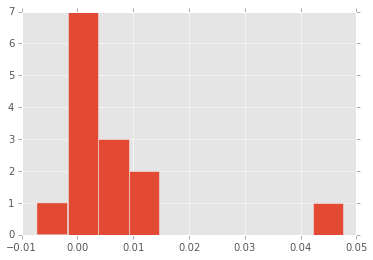

In [51]:
yeardiff.sort(ascending=False)
yeardiff.hist()

In [52]:
print pd.DataFrame(yeardiff).ix[0:10].to_latex(float_format=lambda x: "{0:.2f}%".format(x*100))

SyntaxError: invalid syntax (<ipython-input-52-70bace3608de>, line 1)

In [ ]:
pd.DataFrame(yeardiff).ix['enwiki']

In [ ]:
def trend(langseries):
    result = ols(y=langseries, x=ldf['dayssince'])
    return result.beta[0]

In [ ]:
trends = langdf.apply(lambda x: trend(x), axis=0)

In [ ]:
trends.sort(ascending=False)
trends